<a href="https://colab.research.google.com/github/avani1998/crime-prediction/blob/main/crime_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data used in this project is a combination of features extracted
from four individual datasets.
1. The data for Literacy Rate as
well as Population of each state in India was scraped from the
15th Official Census calculation conducted in 2011
2. Data for Poverty Rate in India is based on Tendulkar poverty
estimation and was appropriated from the official website of
data.gov.in.
3. The data for unemployment rates of each state in
India was scraped from the NSSO (National Sample Survey
Office) report for unemployment released by the Ministry of
Statistics and Programme Implementation.
4. The crime data was sourced from the NCRB (National Crime Records Beareau) website

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
factors_df = pd.read_csv("factors.csv")
for col in factors_df.columns:
  print(col)

State/UT
Literacy rate
poverty rate
Unemployment Rate (in %) - NSSO - 2011-12
crime rate
%contribution
BPL
Unemploy


In [ ]:
factors_df.rename(columns={'Unemployment Rate (in %) - NSSO - 2011-12':'Unemployment rate','poverty rate':'Poverty rate','%contribution':'% Crime contribution'},
            inplace=True)

In [ ]:
factors_df.drop(['crime rate','Unemploy'],axis=1, inplace=True)

In [ ]:
factors_df.dropna(inplace=True)
factors_df.head()

,State/UT,Literacy rate,Poverty rate,Unemployment rate,% Crime contribution,BPL
0,Andhra Pradesh,67.02,9.20,2.0,8.2,5.8
1,Arunachal Pradesh,65.38,34.67,2.2,0.1,20.3
2,Assam,72.19,31.98,4.6,2.9,20.5
3,Bihar,61.80,33.70,3.4,5.8,31.2
4,Chhattisgarh,70.28,35.93,1.4,2.5,24.8


In [ ]:
keep_columns=['Unemployment rate','% Crime contribution','Poverty rate','Literacy rate']
df=factors_df[keep_columns]
df.head()

,Unemployment rate,% Crime contribution,Poverty rate,Literacy rate
0,2.0,8.2,9.20,67.02
1,2.2,0.1,34.67,65.38
2,4.6,2.9,31.98,72.19
3,3.4,5.8,33.70,61.80
4,1.4,2.5,35.93,70.28


In [ ]:
import cufflinks as cf
fig=df.iplot(asFigure=True,kind='box')
fig.show()

The box plot compares the distribution of the four variables:

* **Unemployment rate:** The distribution is narrow and centered around low values, indicating that most unemployment rates in the dataset are relatively low, with little variation.
* **% Crime contribution:** Similar to unemployment, this variable also has a small spread, suggesting that crime contribution is consistently low across observations.
* **Poverty rate:** The range is wider, showing that poverty rates vary significantly across the dataset, with both lower and higher values compared to the other factors.
* **Literacy rate:** This variable also shows significant variation, but at much higher values, indicating that literacy rates in the dataset tend to be high, but with some fluctuation between different regions or groups.

In [ ]:
# import plotly.express as px
# fig1 = px.scatter(factors_df,x="Unemployment rate",y="% Crime contribution",color='State/UT')
# fig1.show()
# #fig2 = px.scatter(dan,x="poverty rate",y="%contribution",color='State/UT')
# #fig2.show()
# #fig3 = px.scatter(dan,x="Literacy rate",y="%contribution",color='State/UT')
# #fig3.show()

In [ ]:
df.corr()

,Unemployment rate,% Crime contribution,Poverty rate,Literacy rate
Unemployment rate,1.000000,-0.293774,-0.219876,0.390664
% Crime contribution,-0.293774,1.000000,-0.019121,-0.357863
Poverty rate,-0.219876,-0.019121,1.000000,-0.528483
Literacy rate,0.390664,-0.357863,-0.528483,1.000000


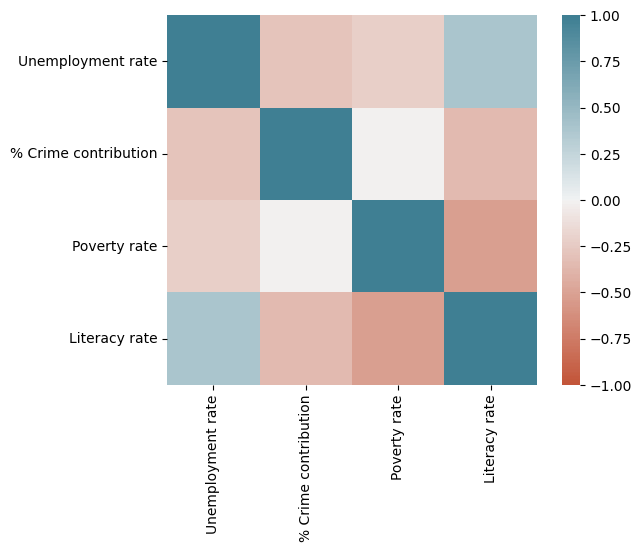

In [ ]:
coMatrix=df.corr()
coMatrix.style.background_gradient(cmap='RdBu')

ax = sns.heatmap(
    coMatrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

* **Unemployment rate vs % Crime contribution**: Shows a slight positive correlation, meaning regions or groups with higher unemployment might have a higher crime contribution.
* **Unemployment rate vs Poverty rate:** The relationship is stronger, indicating that areas with higher unemployment are more likely to have higher poverty rates.
* **Unemployment rate vs Literacy rate**: Negative correlation, suggesting that as literacy increases, unemployment decreases.
* **Poverty rate vs Literacy rate:** There’s a significant negative correlation, implying that higher literacy rates correspond with lower poverty levels.
* **Poverty rate vs % Crime contribution**: Moderate positive correlation, which means regions with higher poverty tend to have a higher crime contribution.


### Inferences
* Literacy rate has a strong inverse relationship with both unemployment and poverty rates, indicating that improving literacy could have a substantial positive impact on reducing poverty and unemployment.
* Poverty rate is significantly linked with crime and unemployment, meaning addressing poverty might also reduce crime rates and unemployment.
* Unemployment rate and % crime contribution are positively correlated, indicating that as unemployment increases, crime might also rise, but the relationship is weaker compared to other factors.

## Checking for multicollineaity
The linear regression might not perform well if the independent variables (Unemployment rate, Poverty rate, Literacy rate) are highly correlated with each other. To check multicollinearity, you could compute the Variance Inflation Factor (VIF).

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
Y=factors_df['% Crime contribution']
X=factors_df[['Unemployment rate','Poverty rate','Literacy rate']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check for multicollinearity (VIF should be < 5)
vif_data = pd.DataFrame()
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
vif_data["Feature"] = X.columns
print(vif_data)

        VIF            Feature
0  1.170531  Unemployment rate
1  1.584722       Poverty rate
2  1.773696      Literacy rate


The Variance Inflation Factor (VIF) measures the level of multicollinearity between independent variables. A higher VIF value indicates that the variable is highly correlated with others, which can lead to instability in the coefficients of regression models.

VIF values below 5 are generally acceptable and indicate that multicollinearity is not a serious issue.
VIF values between 5-10 may suggest moderate multicollinearity.
VIF values above 10 usually indicate high multicollinearity, which can distort model performance and lead to unreliable coefficient estimates.

In [ ]:
def calc_ISE(X_train, y_train, model):

    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return model.score(X_train, y_train), rmse

def calc_OSE(X_test, y_test, model):

    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return model.score(X_test, y_test), rmse

In [ ]:
model = Ridge()
model.fit(X_train_scaled, Y_train)
is_r2, ise = calc_ISE(X_train_scaled, Y_train, model)
os_r2, ose = calc_OSE(X_test_scaled, Y_test, model)

In [ ]:
data_list = (('R^2_in', is_r2), ('R^2_out', os_r2), ('ISE', ise), ('OSE', ose))
for item in data_list:
    print(f'{item[0]:10}: {item[1]}')

R^2_in    : 0.2628933113116839
R^2_out   : -0.052497452390580346
ISE       : 2.7262971502533406
OSE       : 3.4342372862006814


## What do these results mean?
* **R²_in (Training R²)**: The R² (coefficient of determination) for the training set is 0.26, meaning the model explains 26.29% of the variance in the target variable (% Crime contribution) on the training data. This indicates that the model captures some of the relationship between the features and the target, but it's not very strong.
* **R²_out (Test R²)**: The R² on the test set is -0.05, which is worse than 0. A negative R² implies that the model is performing worse than a simple horizontal line (i.e., the mean of the target) on the test data. This suggests the model fails to generalize to unseen data.
* **ISE (In-Sample RMSE)**: The Root Mean Squared Error (RMSE) on the training set is 2.73, representing the average error between the model's predictions and the actual values in the training data.
* **OSE (Out-of-Sample RMSE)**: The RMSE on the test set is 3.43, indicating that on average, the model's predictions are off by around 3.43 units for the test data. The higher RMSE on the test set compared to the training set suggests that the model has overfitted the training data, leading to poor generalization.

### The model does not perfrom well
* Low R²_in: The training R² value of 0.26 indicates that the model explains only a small fraction of the variance in the target variable. Ideally, you'd want a much higher value for a well-performing model.
* Negative R²_out: A negative R² on the test set suggests that the model performs poorly on unseen data. It indicates that the model's predictions are worse than simply predicting the mean of the target variable.
* Higher Test RMSE (OSE): The fact that the test set RMSE (3.43) is higher than the training set RMSE (2.73) shows that the model is overfitting the training data. Overfitting happens when the model captures noise in the training data that doesn't generalize well to new data.


Possible reasons:
1. The features we have selected might not be strong predictors of crime.
2. Ridge regression might not be the best model for this data. We use Random forest to explain non-linear relationships.

In [ ]:
from sklearn.linear_model import RidgeCV

# Use cross-validation to find the best alpha
ridge_cv_model = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge_cv_model.fit(X_train_scaled, Y_train)

# Evaluate the best model
is_r2, ise = calc_ISE(X_train_scaled, Y_train, ridge_cv_model)
os_r2, ose = calc_OSE(X_test_scaled, Y_test, ridge_cv_model)

print(f'Best Alpha: {ridge_cv_model.alpha_}')
print(f'R^2_in: {is_r2}, R^2_out: {os_r2}')


Best Alpha: 10.0
R^2_in: 0.22025709091621304, R^2_out: 0.02856494832600398


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train_scaled, Y_train)

# Make predictions
Y_train_pred = rf_model.predict(X_train_scaled)
Y_test_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
train_mse = mean_squared_error(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
train_r2 = r2_score(Y_train, Y_train_pred)
test_r2 = r2_score(Y_test, Y_test_pred)

# Print results
print(f"Training MSE: {train_mse:.4f}, Training R^2: {train_r2:.4f}")
print(f"Testing MSE: {test_mse:.4f}, Testing R^2: {test_r2:.4f}")

Training MSE: 1.9656, Training R^2: 0.8051
Testing MSE: 15.9702, Testing R^2: -0.4252


## Relationships Between Crime and each Independent Factor.


In [ ]:
from sklearn.metrics import mean_squared_error

model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
is_r2, ise = calc_ISE(X_train, Y_train, model)
os_r2, ose = calc_OSE(X_test, Y_test, model)
# show dataset sizes
data_list = (('R^2_in', is_r2), ('R^2_out', os_r2),
             ('ISE', ise), ('OSE', ose))
for item in data_list:
    print('{:10}: {}'.format(item[0], item[1]))

R^2_in    : 0.2642488982254946
R^2_out   : -0.08472276527621658
ISE       : 2.723789078128938
OSE       : 3.4864155499445566


In [ ]:
from scipy.stats import linregress
print(linregress(factors_df['% Crime contribution'], factors_df['Literacy rate']))
print(linregress(factors_df['% Crime contribution'], factors_df['Unemployment rate']))
print(linregress(factors_df['% Crime contribution'], factors_df['Poverty rate']))

LinregressResult(slope=-0.9364065695316406, intercept=80.60503126643859, rvalue=-0.3578631644451704, pvalue=0.03479594447032603, stderr=0.4253361340422846)
LinregressResult(slope=-0.3469648676662381, intercept=4.62736288055878, rvalue=-0.29377356512736125, pvalue=0.08673172711068965, stderr=0.19652460850961792)
LinregressResult(slope=-0.0651638336482284, intercept=17.975437652324672, rvalue=-0.01912116704312578, pvalue=0.9131835638177148, stderr=0.593138143051468)


The above results suggests that the three independent factors (Literacy Rate, Unemployment Rate, and Poverty Rate) have **limited explanatory power regarding the crime contribution**, especially when considering the overall model fit.   

The significant effect of literacy rate warrants further investigation, but the lack of predictive power in the model overall indicates that either other factors may need to be included or that the existing factors do not fully capture the complexities of crime contribution in the dataset.

In [ ]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

                   Coefficient
Unemployment rate    -0.082736
Poverty rate         -0.112838
Literacy rate        -0.215036


In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[2.55661214 2.28906034 0.89828894 3.58666095 5.86065219 2.01931636
 5.94481627]


In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
model=sm.OLS(Y_train,X_train)
result=model.fit()
predictions=result.predict(X_test)
#print(predictions,Y_test)
print(result.summary())

                                  OLS Regression Results                                 
Dep. Variable:     % Crime contribution   R-squared (uncentered):                   0.399
Model:                              OLS   Adj. R-squared (uncentered):              0.327
Method:                   Least Squares   F-statistic:                              5.542
Date:                  Wed, 29 Sep 2021   Prob (F-statistic):                     0.00467
Time:                          15:00:00   Log-Likelihood:                         -72.267
No. Observations:                    28   AIC:                                      150.5
Df Residuals:                        25   BIC:                                      154.5
Df Model:                             3                                                  
Covariance Type:              nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------

In [ ]:
literature_df=pd.merge(factors_df, pd.read_csv("literature_India.csv") , on='State/UT')
literature_df.dropna(inplace=True)
literature_df.head()

,State/UT,Literacy rate,Poverty rate,Unemployment rate,% Crime contribution,BPL,literacy rate,%male,%female,%urban,%rural
0,Andhra Pradesh,67.02,9.20,2.0,8.2,5.8,67.02,50.179423,49.820577,33.363462,66.636538
1,Arunachal Pradesh,65.38,34.67,2.2,0.1,20.3,65.38,51.593414,48.406586,22.652301,77.267048
2,Assam,72.19,31.98,4.6,2.9,20.5,72.19,51.078830,48.921170,14.064012,85.819682
3,Bihar,61.80,33.70,3.4,5.8,31.2,61.80,52.140675,47.859325,11.267695,88.449100
4,Chhattisgarh,70.28,35.93,1.4,2.5,24.8,70.28,50.236037,49.763963,23.239350,76.741069


In [ ]:
import plotly.graph_objects as go

# Add data
state= literature_df["State/UT"]

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=state, y=literature_df["%male"], name='Male',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=state, y=literature_df["%female"], name = 'Female',
                         line=dict(color='royalblue', width=4)))

fig.add_trace(go.Scatter(x=state, y=literature_df["Literacy rate"], name='Literacy rate',
                         line = dict(color='green', width=4,)))

# Edit the layout
fig.update_layout(title='Literacy rate and gender',
                   xaxis_title='States',
                   yaxis_title='Rates')
fig.show()

In [ ]:
sorted_df_1=factors_df.sort_values('% Crime contribution')
sorted_df_2=factors_df.sort_values('Literacy rate')
sorted_df_3=factors_df.sort_values('Poverty rate')
sorted_df_4=factors_df.sort_values('Unemployment rate')

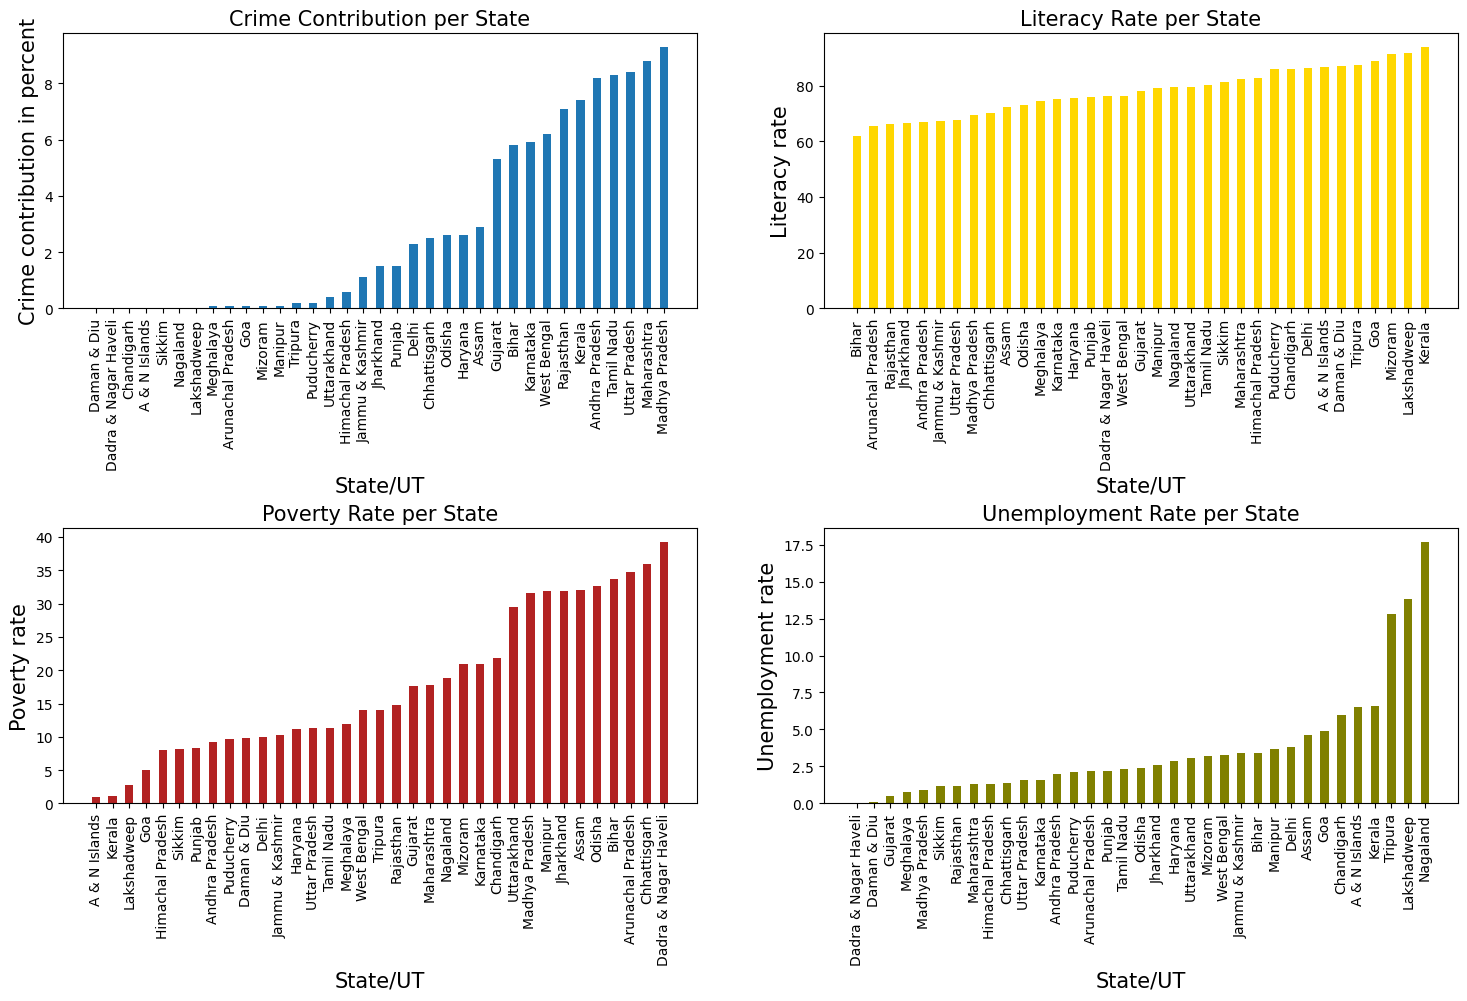

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
axs[0, 0].bar(sorted_df_1['State/UT'], sorted_df_1['% Crime contribution'], width=0.5)
axs[0, 0].set_xlabel("State/UT", size=15)
axs[0, 0].set_ylabel("Crime contribution in percent", size=15)
axs[0, 0].set_title("Crime Contribution per State", size=15)
axs[0, 0].tick_params(axis='x', rotation=90)

axs[0, 1].bar(sorted_df_2['State/UT'], sorted_df_2['Literacy rate'], width=0.5, color='gold')
axs[0, 1].set_xlabel("State/UT", size=15)
axs[0, 1].set_ylabel("Literacy rate", size=15)
axs[0, 1].set_title("Literacy Rate per State", size=15)
axs[0, 1].tick_params(axis='x', rotation=90)

sorted_df3 = sorted_df.sort_values(by='Poverty rate')
axs[1, 0].bar(sorted_df_3['State/UT'], sorted_df_3['Poverty rate'], width=0.5, color='firebrick')
axs[1, 0].set_xlabel("State/UT", size=15)
axs[1, 0].set_ylabel("Poverty rate", size=15)
axs[1, 0].set_title("Poverty Rate per State", size=15)
axs[1, 0].tick_params(axis='x', rotation=90)

# 4th Plot - Unemployment Rate
sorted_df4 = sorted_df.sort_values(by='Unemployment rate')
axs[1, 1].bar(sorted_df_4['State/UT'], sorted_df_4['Unemployment rate'], width=0.5, color='olive')
axs[1, 1].set_xlabel("State/UT", size=15)
axs[1, 1].set_ylabel("Unemployment rate", size=15)
axs[1, 1].set_title("Unemployment Rate per State", size=15)
axs[1, 1].tick_params(axis='x', rotation=90)


plt.subplots_adjust(hspace=0.8)

### Literacy Plots

In [ ]:
# plt.figure(figsize=(10,6))
# plt.bar('State/UT', '% Crime contribution',data=sorted_df_1, width=0.5)
# plt.xlabel("State/UT", size=15)
# plt.ylabel("Crime contribution in per cent", size=15)
# plt.title("Crime Contribution per State", size=15)
# plt.xticks(rotation='vertical')
# plt.show()

In [ ]:
# plt.figure(figsize=(10,6))
# plt.bar('State/UT', 'Literacy rate',data=sorted_df_2, width=0.5, color='gold')
# plt.xlabel("State/UT", size=15)
# plt.ylabel("Literacy rate", size=15)
# plt.title("Literacy rate per State", size=15)
# plt.xticks(rotation='vertical')
# plt.show()

In [ ]:
# plt.figure(figsize=(10,6))
# plt.bar('State/UT', 'Poverty rate',data=sorted_df_3, width=0.5, color='firebrick')
# plt.xlabel("State/UT", size=15)
# plt.ylabel("Poverty rate", size=15)
# plt.title("poverty rate per State", size=15)
# plt.xticks(rotation='vertical')
# plt.show()

In [ ]:
# plt.figure(figsize=(10,6))
# plt.bar('State/UT', 'Unemployment rate',data=sorted_df_4, width=0.5, color='olive')
# plt.xlabel("State/UT", size=15)
# plt.ylabel("Unemployment rate", size=15)
# plt.title("Unemployment per State", size=15)
# plt.xticks(rotation='vertical')
# plt.show()